In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farbodsiahkali","key":"7b99d141128d6181f417289d58a2d0cf"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           9951        296  1.0              
mattop/alcohol-consumption-per-capita-2016                      Alcohol Consumption Per Capita 2016                   4KB  2022-12-09 00:03:11           1058         42  1.0              
michals22/coffee-dataset                                        Coffee dataset                                       24KB  2022-12-15 20:02:12           1276         43  1.0              
thedevastator/jobs-dataset-from-glassdoor                   

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 91% 60.0M/66.0M [00:00<00:00, 162MB/s]
100% 66.0M/66.0M [00:00<00:00, 155MB/s]


In [ ]:
!unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

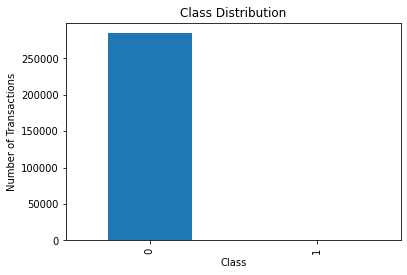

In [ ]:
fnf = df["Class"].value_counts()
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
fnf.plot(kind = 'bar',title = 'Class Distribution')

In [ ]:
df_nonfraud = df[df.Class == 0]
df_fraud = df[df.Class == 1]

print(df_nonfraud.Amount.describe())
print(df_fraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
_________________________
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
F: 9.033344712018891
p: 0.0026512206498171095


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

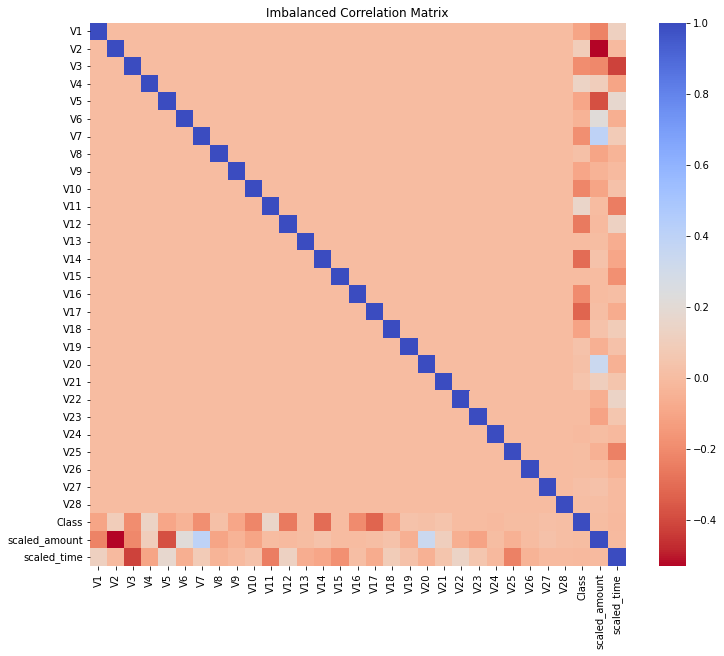

In [ ]:
corr = df_scaled.corr() 
f, ax = plt.subplots(1, 1, figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':10})
ax.set_title("Imbalanced Correlation Matrix", fontsize=12)

In [ ]:
def prep_data(df):
    X = df.drop(['Class'],axis=1, inplace=False) #  
    X = np.array(X).astype(np.float)
    y = df[['Class']]  
    y = np.array(y).astype(np.float)
    return X,y
X, y = prep_data(df_scaled)

<ipython-input-15-77c694dd73f1>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(X).astype(np.float)
<ipython-input-15-77c694dd73f1>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.array(y).astype(np.float)


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

undersam = RandomUnderSampler(random_state=0)
oversam = RandomOverSampler(random_state=0)
smote = SMOTE(sampling_strategy=0.6 ,random_state=0)
borderlinesmote = BorderlineSMOTE(kind='borderline-2',random_state=0)

X_undersam, y_undersam = undersam.fit_resample(X_train,y_train)
X_oversam, y_oversam = oversam.fit_resample(X_train,y_train)
X_smote, y_smote = smote.fit_resample(X_train,y_train)
X_borderlinesmote, y_borderlinesmote = borderlinesmote.fit_resample(X_train,y_train)

In [ ]:
print(X_smote.shape)
print(y_smote.shape)

(318430, 30)
(318430,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1) 
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['scaled_time', 'scaled_amount'], axis=1)

X1_train, X1_test = train_test_split(data, test_size=.3, random_state=0)

y1_train = X1_train['Class']
X1_train = X1_train.drop(['Class'], axis=1)

y1_test = X1_test['Class']
X1_test  = X1_test.drop(['Class'], axis=1)

X1_train = X1_train.values
X1_test = X1_test.values
print(X1_train.shape)
print(X1_test.shape)

(199364, 29)
(85443, 29)


In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

learning_rate = 1e-5

input_dim = X1_train.shape[1] #29
input_layer = Input(shape=(input_dim, ))
encoder1 = Dense(22, activation="tanh", activity_regularizer=
                          regularizers.l1(learning_rate))(input_layer)
encoder2 = Dense(15, activation="relu")(encoder1)
encoder3 = Dense(10, activation="tanh")(encoder2)
decoder1 = Dense(15, activation='relu')(encoder3)
decoder2 = Dense(22, activation='tanh')(decoder1)
decoder3 = Dense(input_dim, activation='relu')(decoder2)

autoencoder = Model(inputs=input_layer, outputs=decoder3)

In [ ]:
nb_epoch = 100
batch_size = 128
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

checkpointer = ModelCheckpoint(filepath='autoencoder_fraud.h5',
                               save_best_only=True,
                               verbose=0)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X1_train, X1_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X1_test, X1_test),
                          verbose=1,
                          callbacks=[checkpointer, tensorboard]).history
                
load_model('autoencoder_fraud.h5')

Epoch 1/100
1558/1558 [==============================] - 4s 2ms/step - loss: 0.8470 - accuracy: 0.5882 - val_loss: 0.7817 - val_accuracy: 0.6856
Epoch 2/100
1558/1558 [==============================] - 3s 2ms/step - loss: 0.7600 - accuracy: 0.7033 - val_loss: 0.7361 - val_accuracy: 0.7209
Epoch 3/100
1558/1558 [==============================] - 3s 2ms/step - loss: 0.7290 - accuracy: 0.7295 - val_loss: 0.7224 - val_accuracy: 0.7410
Epoch 4/100
1558/1558 [==============================] - 3s 2ms/step - loss: 0.7191 - accuracy: 0.7412 - val_loss: 0.7150 - val_accuracy: 0.7509
Epoch 5/100
1558/1558 [==============================] - 3s 2ms/step - loss: 0.7125 - accuracy: 0.7489 - val_loss: 0.7091 - val_accuracy: 0.7502
Epoch 6/100
1558/1558 [==============================] - 3s 2ms/step - loss: 0.7074 - accuracy: 0.7526 - val_loss: 0.7045 - val_accuracy: 0.7576
Epoch 7/100
1558/1558 [==============================] - 3s 2ms/step - loss: 0.7029 - accuracy: 0.7581 - val_loss: 0.7023 - val_ac

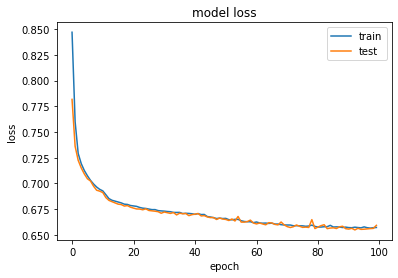

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [ ]:
X1_train_denoised = autoencoder.predict(X1_train)
X1_test_denoised = autoencoder.predict(X1_test)

mse = np.mean(np.power(X1_test - X1_test_denoised, 2), axis=1)
df_error = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y1_test})
df_error.describe()

2671/2671 [==============================] - 2s 755us/step


,reconstruction_error,true_class
count,85443.000000,85443.000000
mean,0.659090,0.001720
std,5.779029,0.041443
min,0.032332,0.000000
25%,0.199539,0.000000
50%,0.333199,0.000000
75%,0.547464,0.000000
max,1407.620918,1.000000


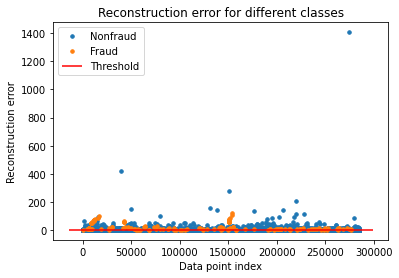

Confusion_matrix:
 [[ 3894 81402]
 [    0   147]]
Accuracy: 0.04729468768652786
Recall: 1.0
Precision: 0.045652785593697245
F1: 0.08731920618903465
Confusion_matrix:
 [[21440 63856]
 [    2   145]]
Accuracy: 0.2526245567220252
Recall: 0.9999067251189254
Precision: 0.25135996998686927
F1: 0.4017313421649272
Confusion_matrix:
 [[38061 47235]
 [    4   143]]
Accuracy: 0.44712849502007185
Recall: 0.9998949165900434
Precision: 0.4462225661226787
F1: 0.6170669822715444
Confusion_matrix:
 [[50825 34471]
 [    7   140]]
Accuracy: 0.59647952436127
Recall: 0.9998622914699402
Precision: 0.5958661601950853
F1: 0.7467236718382698
Confusion_matrix:
 [[60348 24948]
 [   10   137]]
Accuracy: 0.7078988331402222
Recall: 0.9998343218794526
Precision: 0.7075126617895329
F1: 0.8286487154489406
Confusion_matrix:
 [[67351 17945]
 [   12   135]]
Accuracy: 0.7898364991865923
Recall: 0.9998218606653504
Precision: 0.7896149878071657
F1: 0.882371822165742
Confusion_matrix:
 [[72247 13049]
 [   13   134]]
Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix

set_threshold = 0.1
groups = df_error.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, 
            group.reconstruction_error, 
            marker='o', 
            ms=3.5, 
            linestyle='',
            label= "Fraud" if name == 1 else "Nonfraud")

ax.hlines(set_threshold, 
          ax.get_xlim()[0], 
          ax.get_xlim()[1], 
          colors="r", 
          zorder=100, 
          label='Threshold')

ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

rec = list()
acc = list()

set_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for t in set_thresholds:
  y_pred = [1 if e > t else 0 for e in df_error.reconstruction_error.values]
  conf_mat = confusion_matrix(df_error.true_class, y_pred)
  print('Confusion_matrix:\n',conf_mat)
  print('Accuracy:', ( conf_mat[0][0]+conf_mat[1][1] ) / sum(sum(conf_mat)) )
  print('Recall:', conf_mat[0][0] / ( conf_mat[0][0]+conf_mat[1][0] ) )
  re = conf_mat[0][0] / ( conf_mat[0][0]+conf_mat[1][0] ) 
  print('Precision:', conf_mat[0][0] / ( conf_mat[0][0]+conf_mat[0][1] ) )
  pr = conf_mat[0][0] / ( conf_mat[0][0]+conf_mat[0][1] ) 
  print('F1:', 2*pr*re/(pr+re))
  rec.append(conf_mat[0][0] / ( conf_mat[0][0]+conf_mat[1][0] ))
  acc.append(( conf_mat[0][0]+conf_mat[1][1] ) / sum(sum(conf_mat)) )

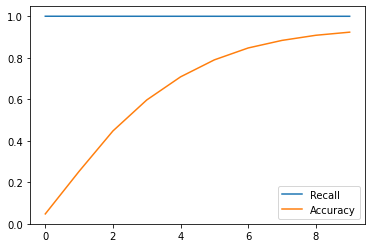

In [ ]:
plt.plot(rec, label='Recall')
plt.plot(acc, label='Accuracy')
plt.legend()

In [ ]:
learning_rate = 2e-4

input_layer = Input(shape=(29, ))
layer1 = Dense(22, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
layer2 = Dense(15, activation="relu")(layer1)
layer3 = Dense(10, activation="tanh")(layer2)
layer4 = Dense(5, activation='relu')(layer3)
layer5 = Dense(2, activation='softmax')(layer4)

classifier = Model(inputs=input_layer, outputs=layer5)

In [ ]:
layer = tf.keras.layers.CategoryEncoding(num_tokens=2, output_mode="one_hot")
y1_testt=layer(np.array(y1_test))
y1_trainn=layer(np.array(y1_train))

In [ ]:
nb_epoch = 50
batch_size = 128
classifier.compile(metrics=['accuracy'],
                    loss='binary_crossentropy',
                    optimizer='adam')

checkpointer2 = ModelCheckpoint(filepath='classifier_fraud.h5',
                               save_best_only=True,
                               verbose=0)

tensorboard2 = TensorBoard(log_dir='./logs2',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = classifier.fit(X1_train, y1_trainn,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X1_test, y1_testt),
                          verbose=1,
                          callbacks=[checkpointer2, tensorboard2]).history
                
load_model('classifier_fraud.h5')

Epoch 1/50
1558/1558 [==============================] - 4s 2ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0116 - val_accuracy: 0.9983
Epoch 2/50
1558/1558 [==============================] - 3s 2ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0131 - val_accuracy: 0.9983
Epoch 3/50
1558/1558 [==============================] - 3s 2ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0129 - val_accuracy: 0.9983
Epoch 4/50
1558/1558 [==============================] - 3s 2ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0110 - val_accuracy: 0.9984
Epoch 5/50
1558/1558 [==============================] - 3s 2ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0126 - val_accuracy: 0.9983
Epoch 6/50
1558/1558 [==============================] - 3s 2ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0135 - val_accuracy: 0.9983
Epoch 7/50
1558/1558 [==============================] - 3s 2ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0117 - val_accuracy:

In [ ]:
y1_test_pred = classifier.predict(X1_test)

2671/2671 [==============================] - 2s 849us/step


In [ ]:
thresh = 0.1
y_test_predd = [0 if e[0] > thresh else 1 for e in y1_test_pred]
conf_mat = confusion_matrix(y1_test, y_test_predd)
print('Confusion_matrix:\n',conf_mat)
print('Accuracy:', (conf_mat[0][0]+conf_mat[1][1])/sum(sum(conf_mat)))
print('Recall:', (conf_mat[0][0])/(conf_mat[0][0]+conf_mat[1][0]))

thresh = 0.2
y_test_predd = [0 if e[0] > thresh else 1 for e in y1_test_pred]
conf_mat = confusion_matrix(y1_test, y_test_predd)
print('Confusion_matrix:\n',conf_mat)
print('Accuracy:', (conf_mat[0][0]+conf_mat[1][1])/sum(sum(conf_mat)))
print('Recall:', (conf_mat[0][0])/(conf_mat[0][0]+conf_mat[1][0]))

thresh = 0.3
y_test_predd = [0 if e[0] > thresh else 1 for e in y1_test_pred]
conf_mat = confusion_matrix(y1_test, y_test_predd)
print('Confusion_matrix:\n',conf_mat)
print('Accuracy:', (conf_mat[0][0]+conf_mat[1][1])/sum(sum(conf_mat)))
print('Recall:', (conf_mat[0][0])/(conf_mat[0][0]+conf_mat[1][0]))

thresh = 0.4
y_test_predd = [0 if e[0] > thresh else 1 for e in y1_test_pred]
conf_mat = confusion_matrix(y1_test, y_test_predd)
print('Confusion_matrix:\n',conf_mat)
print('Accuracy:', (conf_mat[0][0]+conf_mat[1][1])/sum(sum(conf_mat)))
print('Recall:', (conf_mat[0][0])/(conf_mat[0][0]+conf_mat[1][0]))

thresh = 0.5
y_test_predd = [0 if e[0] > thresh else 1 for e in y1_test_pred]
conf_mat = confusion_matrix(y1_test, y_test_predd)
print('Confusion_matrix:\n',conf_mat)
print('Accuracy:', (conf_mat[0][0]+conf_mat[1][1])/sum(sum(conf_mat)))
print('Recall:', (conf_mat[0][0])/(conf_mat[0][0]+conf_mat[1][0]))

thresh = 0.6
y_test_predd = [0 if e[0] > thresh else 1 for e in y1_test_pred]
conf_mat = confusion_matrix(y1_test, y_test_predd)
print('Confusion_matrix:\n',conf_mat)
print('Accuracy:', (conf_mat[0][0]+conf_mat[1][1])/sum(sum(conf_mat)))
print('Recall:', (conf_mat[0][0])/(conf_mat[0][0]+conf_mat[1][0]))

thresh = 0.7
y_test_predd = [0 if e[0] > thresh else 1 for e in y1_test_pred]
conf_mat = confusion_matrix(y1_test, y_test_predd)
print('Confusion_matrix:\n',conf_mat)
print('Accuracy:', (conf_mat[0][0]+conf_mat[1][1])/sum(sum(conf_mat)))
print('Recall:', (conf_mat[0][0])/(conf_mat[0][0]+conf_mat[1][0]))

thresh = 0.8
y_test_predd = [0 if e[0] > thresh else 1 for e in y1_test_pred]
conf_mat = confusion_matrix(y1_test, y_test_predd)
print('Confusion_matrix:\n',conf_mat)
print('Accuracy:', (conf_mat[0][0]+conf_mat[1][1])/sum(sum(conf_mat)))
print('Recall:', (conf_mat[0][0])/(conf_mat[0][0]+conf_mat[1][0]))

thresh = 0.9
y_test_predd = [0 if e[0] > thresh else 1 for e in y1_test_pred]
conf_mat = confusion_matrix(y1_test, y_test_predd)
print('Confusion_matrix:\n',conf_mat)
print('Accuracy:', (conf_mat[0][0]+conf_mat[1][1])/sum(sum(conf_mat)))
print('Recall:', (conf_mat[0][0])/(conf_mat[0][0]+conf_mat[1][0]))

Confusion_matrix:
 [[85287     9]
 [   41   106]]
Accuracy: 0.9994148145547324
Recall: 0.9995195012188262
Confusion_matrix:
 [[85286    10]
 [   40   107]]
Accuracy: 0.9994148145547324
Recall: 0.9995312097133348
Confusion_matrix:
 [[85285    11]
 [   38   109]]
Accuracy: 0.9994265182636377
Recall: 0.9995546335689087
Confusion_matrix:
 [[85285    11]
 [   38   109]]
Accuracy: 0.9994265182636377
Recall: 0.9995546335689087
Confusion_matrix:
 [[85283    13]
 [   38   109]]
Accuracy: 0.999403110845827
Recall: 0.9995546231291241
Confusion_matrix:
 [[85278    18]
 [   34   113]]
Accuracy: 0.9993914071369217
Recall: 0.9996014628657164
Confusion_matrix:
 [[85277    19]
 [   33   114]]
Accuracy: 0.9993914071369217
Recall: 0.9996131754776697
Confusion_matrix:
 [[85274    22]
 [   33   114]]
Accuracy: 0.9993562960102056
Recall: 0.9996131618741722
Confusion_matrix:
 [[85269    27]
 [   27   120]]
Accuracy: 0.9993679997191109
Recall: 0.999683455261677
